In [1]:
import numpy as np
import cupy as cp
from numba import jit, prange
import timeit
import matplotlib.pyplot as plt

In [2]:
def divide_base(a, b):
    c = np.divide(a, b)

def divide_cp(a, b):
    c = cp.divide(a, b)
    
@jit(nopython=True)
def divide_nb(a, b):
    c = np.divide(a, b)
    
@jit(nopython=True, parallel=True)
def divide_nb_parallel(a, b):
    c = np.divide(a, b)

In [3]:
N = [int(8*2**i) for i in range(24)]
methods = ["base", "cp", "nb", "nb_parallel"]
K = len(methods)
funcs = [divide_base, divide_cp, divide_nb, divide_nb_parallel]
T = [[] for i in range(K)]
for n in N:
    print("Start with size:", n)
    a = np.random.rand(n, 1)
    b = np.random.rand(n, 1)
    ca = cp.array(a)
    cb = cp.array(b)
    
    args = [(a,b), (ca,cb), (a,b), (a,b)]
    
    for i in range(K):
        t = %timeit -q -n 1 -r 3 -o funcs[i](*args[i])
        T[i].append(t.average*1000)

Start with size: 8
Start with size: 16
Start with size: 32
Start with size: 64
Start with size: 128
Start with size: 256
Start with size: 512
Start with size: 1024
Start with size: 2048
Start with size: 4096
Start with size: 8192
Start with size: 16384
Start with size: 32768
Start with size: 65536
Start with size: 131072
Start with size: 262144
Start with size: 524288
Start with size: 1048576
Start with size: 2097152
Start with size: 4194304
Start with size: 8388608
Start with size: 16777216
Start with size: 33554432
Start with size: 67108864


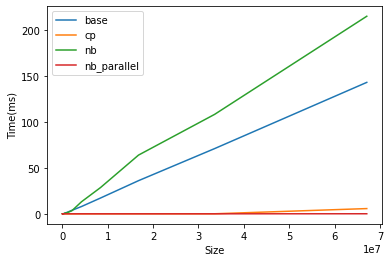

In [4]:
for i in range(K):
    plt.plot(N[1:], T[i][1:], label=methods[i])
plt.xlabel("Size")
plt.ylabel("Time(ms)")
plt.legend()
plt.show()